# Import modules



In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Loading Dataset



In [158]:
#LOAD THE DATASET

df1 = pd.read_csv('''C:\\Users\\CN\\Desktop\\Himanshu\\2221486-Datasets\\Capstone+Project+1\\Credit_card.csv''')
df2 = pd.read_csv('''C:\\Users\\CN\\Desktop\\Himanshu\\2221486-Datasets\\Capstone+Project+1\\Credit_card_label.csv''')

#JOIN BOTH THE DATASET INTO A SINGLE DATASET
df = pd.merge(df1, df2, on='Ind_ID', how='left')

In [159]:
#TO CHECK THE HEAD OF DATASET
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [161]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


# Data Preprocessing

In [162]:
#find null values
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [163]:
#Drop the Type_Occupation column because it has more that 30% data is missing
df.drop(df.columns[[16]], axis=1, inplace=True)

In [164]:
#filling missing values for statistically mean
gender_mode = df['GENDER'].mode()[0]
df['GENDER'].fillna(gender_mode, inplace=True)
mean_annual_income = df['Annual_income'].mean()
df['Annual_income'].fillna(mean_annual_income, inplace=True)
mean_Age = df['Birthday_count'].mean()
df['Birthday_count'].fillna(mean_Age, inplace=True)

# Checking outliers 

In [165]:
#As we can see Annual column have outliers
px.box(x=df['Annual_income'])

In [166]:
#Removing outliers in Annual income column
# Calculate Q1 and Q3 for the specific column
Q1 = df['Annual_income'].quantile(0.25)
Q3 = df['Annual_income'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate potential outliers using the IQR method
LL = Q1 - 1.5 * IQR
UL = Q3 + 1.5 * IQR
print(IQR)
print(Q1)
print(Q3)

#REPLACED OUTLIERS IN ANNUAL INCOME COLUMN WITH THE HELP OF CLIP FUNCTION
df['Annual_income'] = df['Annual_income'].clip(lower=LL, upper=UL)

103500.0
121500.0
225000.0


In [167]:
px.box(x=df['Employed_days'])

In [168]:
# Calculate Q1 and Q3 for the Employed_days column
q1 = df['Employed_days'].quantile(0.25)
q3 = df['Employed_days'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = q3 - q1

# Calculate potential outliers using the IQR method
ll = q1 - 1.5 * IQR
ul = q3 + 1.5 * IQR

#REPLACED OUTLIERS IN Employed_days COLUMN
df['Employed_days'] = df['Employed_days'].clip(lower=ll, upper=ul)

In [169]:
#Dropping Duplicates if any
df_no_duplicates = df.drop_duplicates()

# Exploratory Data Analysis 

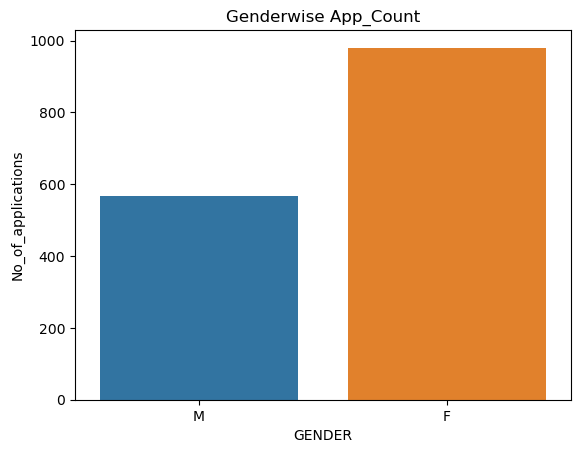

In [170]:
sns.countplot(x='GENDER', data=df)
plt.xlabel('GENDER')
plt.ylabel('No_of_applications')
plt.title('Genderwise App_Count')
plt.show()

In [171]:
# Function to define category based on Employed_days
def Emp_Status(Employed_days):
    if Employed_days > 0:
        return 'Unemployed'
    else:
        return 'Employed'
    
# Applying the function to create a new column 'Employed_days'
df['Emp_Status'] = df['Employed_days'].apply(Emp_Status)

# Displaying the DataFrame after adding the new 'Employed_days' column
print("\nDataFrame after adding the 'Emp_Status' column:")


DataFrame after adding the 'Emp_Status' column:


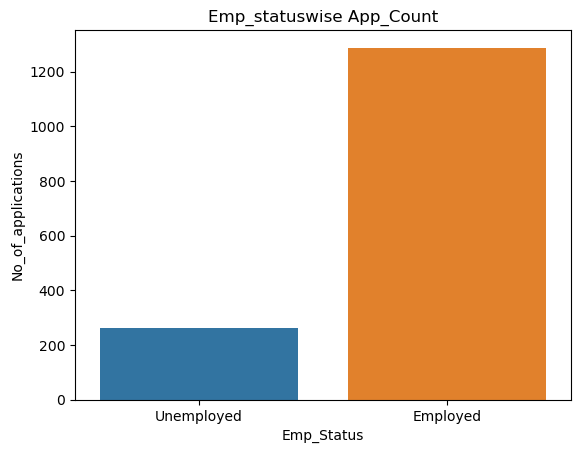

In [172]:
# Creating a bar chart using seaborn for better visualization
sns.countplot(x='Emp_Status', data=df)
plt.xlabel('Emp_Status')
plt.ylabel('No_of_applications')
plt.title('Emp_statuswise App_Count')
plt.show()

C:\Users\CN\AppData\Local\Temp\ipykernel_14396\1022661896.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Annual_income', ylabel='Density'>

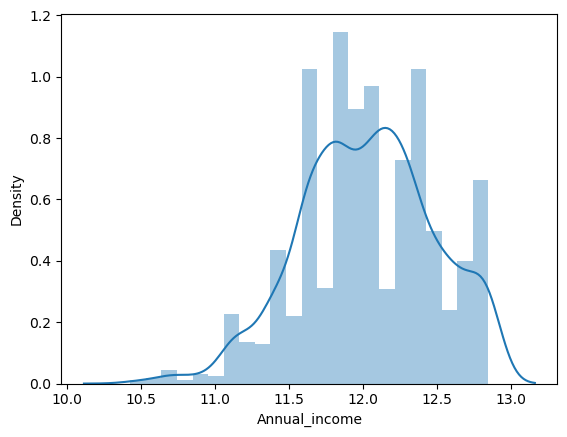

In [173]:
#Numerical attributes Vizualization
#apply log transformation to the attributes
df['Annual_income'] = np.log(df['Annual_income'])

sns.distplot(df['Annual_income'])

C:\Users\CN\AppData\Local\Temp\ipykernel_14396\3118503508.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Birthday_count', ylabel='Density'>

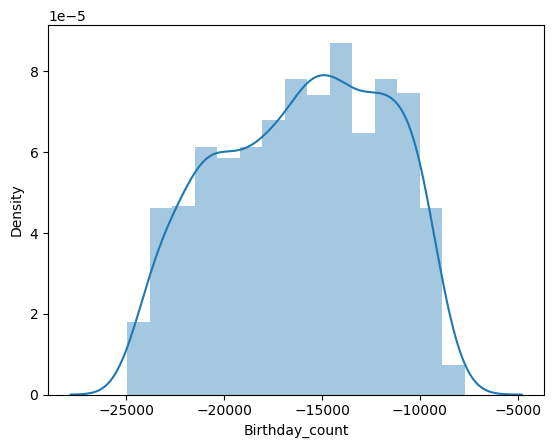

In [174]:
sns.distplot(df['Birthday_count'])

C:\Users\CN\AppData\Local\Temp\ipykernel_14396\3206093847.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Employed_days', ylabel='Density'>

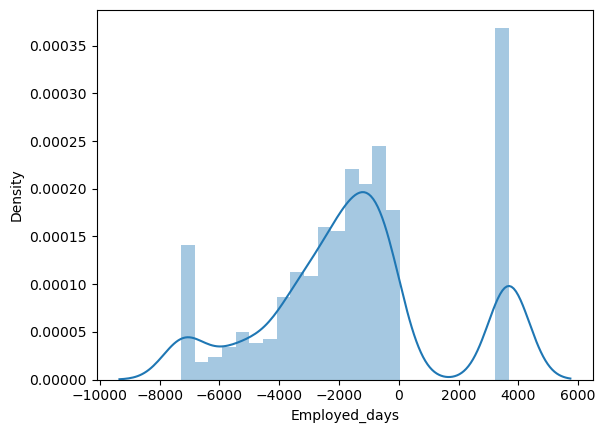

In [175]:
sns.distplot(df['Employed_days'])

# Feature Encoding

In [176]:
#Replacing all the keywords of martial status column with married and not married
word_mapping = {'Single / not married': 'Not married', 'Separated': 'Not married', 'Widow': 'Not married','Civil marriage':'Married'}

# Replace the words in the Marital_status column
df['Marital_status'] = df['Marital_status'].replace(word_mapping)

In [177]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'GENDER' column
df['Gender_encoded'] = label_encoder.fit_transform(df['GENDER'])

# Fit and transform the Car_Owner column
df['CarOwner_encoded'] = label_encoder.fit_transform(df['Car_Owner'])

# Fit and transform the Propert_Owner column
df['PropertyOwner_encoded'] = label_encoder.fit_transform(df['Propert_Owner'])

#Applying fit transformation to the Marital_status column
df['Martial_Status_en'] = label_encoder.fit_transform(df['Marital_status'])

#Label encoding of Education column
oe=OrdinalEncoder(categories=[['Higher education', 'Incomplete higher', 'Academic degree', 'Secondary / secondary special','Lower secondary']])
df['Education_encoded']=oe.fit_transform(df[['EDUCATION']])

In [192]:
#DROP THE COLUMNS WHICH ARE NOT REQUIRED IN OUR ANALYSIS
df.drop(df.columns[[4]], axis=1, inplace=True)

In [197]:
df.head()

,Annual_income,Age,Tenure,label,Gender_encoded,CarOwner_encoded,PropertyOwner_encoded,Martial_Status_en,Education_encoded
0,12.100712,51,10,1,1,1,1,0,0.0
1,12.660328,37,1,1,0,1,0,0,0.0
2,12.660328,43,1,1,0,1,0,0,0.0
3,12.162117,37,1,1,0,1,0,0,0.0
4,12.660328,37,1,1,0,1,0,0,0.0


In [181]:
#Renaming few columns 
df.rename(columns={'Birthday_count': 'Age', 'Employed_days': 'Tenure'}, inplace=True)

# Train Test Split 

In [204]:
#specify input and output attributes

X = df.drop(columns=['label'], axis=1)
y = df['label']

In [205]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# Model_training (Checking accuracy with cross validation)

In [208]:
#classify the model
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    #cross validation - it is for better validation of model 
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

# Logistic Regression

In [210]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 90.32258064516128
Cross validation is 88.69506211504333


C:\Users\CN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\CN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\CN\anaconda3\Lib\site-packages\sklearn\

# DecisionTreeClassifier

In [211]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 87.74193548387098
Cross validation is 81.00762083724815


# RandomForestClassifier

In [212]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
model  = RandomForestClassifier()
classify(model, X, y)


Accuracy is 93.54838709677419
Cross validation is 87.07923582837458


# ExtraTreesClassifier 

In [213]:
model  = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 92.25806451612904
Cross validation is 86.49838187702265


# Conclusion: As we check from above 3 models out of which Random Forest Classifier is providing the high Accuracy with high cross validation data.